In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_file = 'train_FD001.txt'
test_file = 'test_FD001.txt'
rul_file = 'RUL_FD001.txt'

column_names = [
    "EngineID", "Cycle", "Op1", "Op2", "Op3",
    "Sensor1", "Sensor2", "Sensor3", "Sensor4", "Sensor5",
    "Sensor6", "Sensor7", "Sensor8", "Sensor9", "Sensor10",
    "Sensor11", "Sensor12", "Sensor13", "Sensor14", "Sensor15",
    "Sensor16", "Sensor17", "Sensor18", "Sensor19", "Sensor20",
    "Sensor21"
]

# Load the training data
train_df = pd.read_csv(train_file, delim_whitespace=True, header=None, names=column_names)

# Load the test data
test_df = pd.read_csv(test_file, delim_whitespace=True, header=None, names=column_names)

# Load the RUL data
rul_df = pd.read_csv(rul_file, header=None, names=["RUL"])

# Display basic information
print("Training Data Overview:")
print(train_df.info())
print("\nTraining Data Sample:")
print(train_df.head())

print("\nTest Data Overview:")
print(test_df.info())
print("\nTest Data Sample:")
print(test_df.head())

print("\nRUL Data Overview:")
print(rul_df.info())
print("\nRUL Data Sample:")
print(rul_df.head())

# Basic statistics
print("\nTraining Data Statistics:")
print(train_df.describe())

# Check for missing values
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

<ipython-input-3-bdd49ea1340e>:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_df = pd.read_csv(train_file, delim_whitespace=True, header=None, names=column_names)
<ipython-input-3-bdd49ea1340e>:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_df = pd.read_csv(test_file, delim_whitespace=True, header=None, names=column_names)


Training Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EngineID  20631 non-null  int64  
 1   Cycle     20631 non-null  int64  
 2   Op1       20631 non-null  float64
 3   Op2       20631 non-null  float64
 4   Op3       20631 non-null  float64
 5   Sensor1   20631 non-null  float64
 6   Sensor2   20631 non-null  float64
 7   Sensor3   20631 non-null  float64
 8   Sensor4   20631 non-null  float64
 9   Sensor5   20631 non-null  float64
 10  Sensor6   20631 non-null  float64
 11  Sensor7   20631 non-null  float64
 12  Sensor8   20631 non-null  float64
 13  Sensor9   20631 non-null  float64
 14  Sensor10  20631 non-null  float64
 15  Sensor11  20631 non-null  float64
 16  Sensor12  20631 non-null  float64
 17  Sensor13  20631 non-null  float64
 18  Sensor14  20631 non-null  float64
 19  Sensor15  20631 non-null  float64
 20  Sens

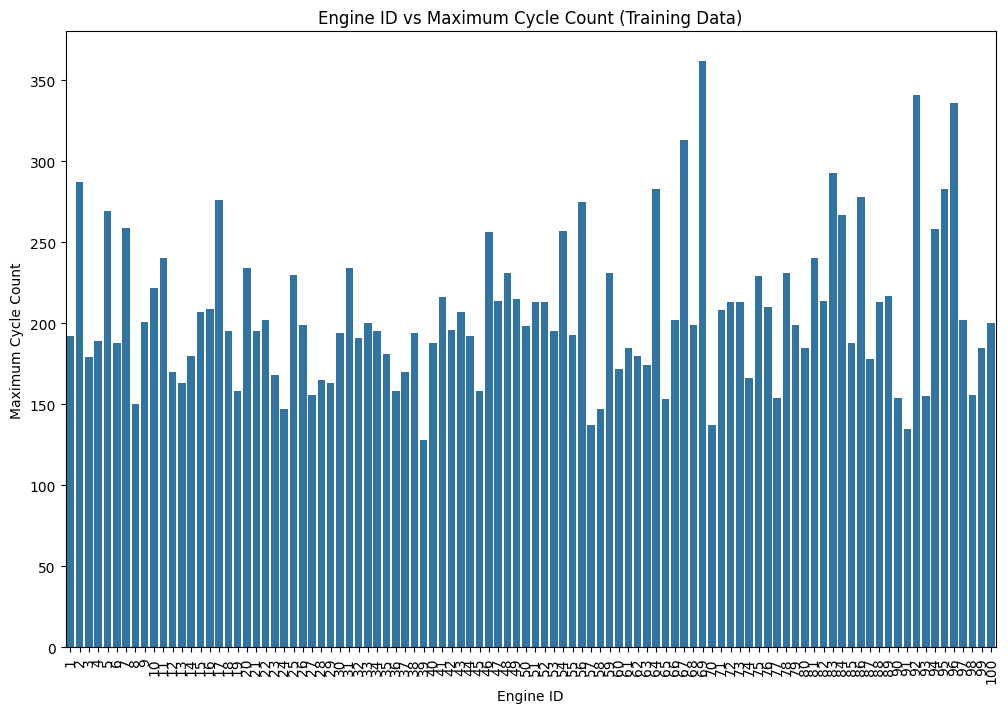

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the maximum cycle count for each engine in the training dataset
engine_max_cycles_train = train_df.groupby('EngineID')['Cycle'].max().reset_index()
engine_max_cycles_train.columns = ['EngineID', 'MaxCycle']

plt.figure(figsize=(12, 8))
sns.barplot(x='EngineID', y='MaxCycle', data=engine_max_cycles_train)
plt.title('Engine ID vs Maximum Cycle Count (Training Data)')
plt.xlabel('Engine ID')
plt.ylabel('Maximum Cycle Count')
plt.xticks(rotation=90)
plt.show()


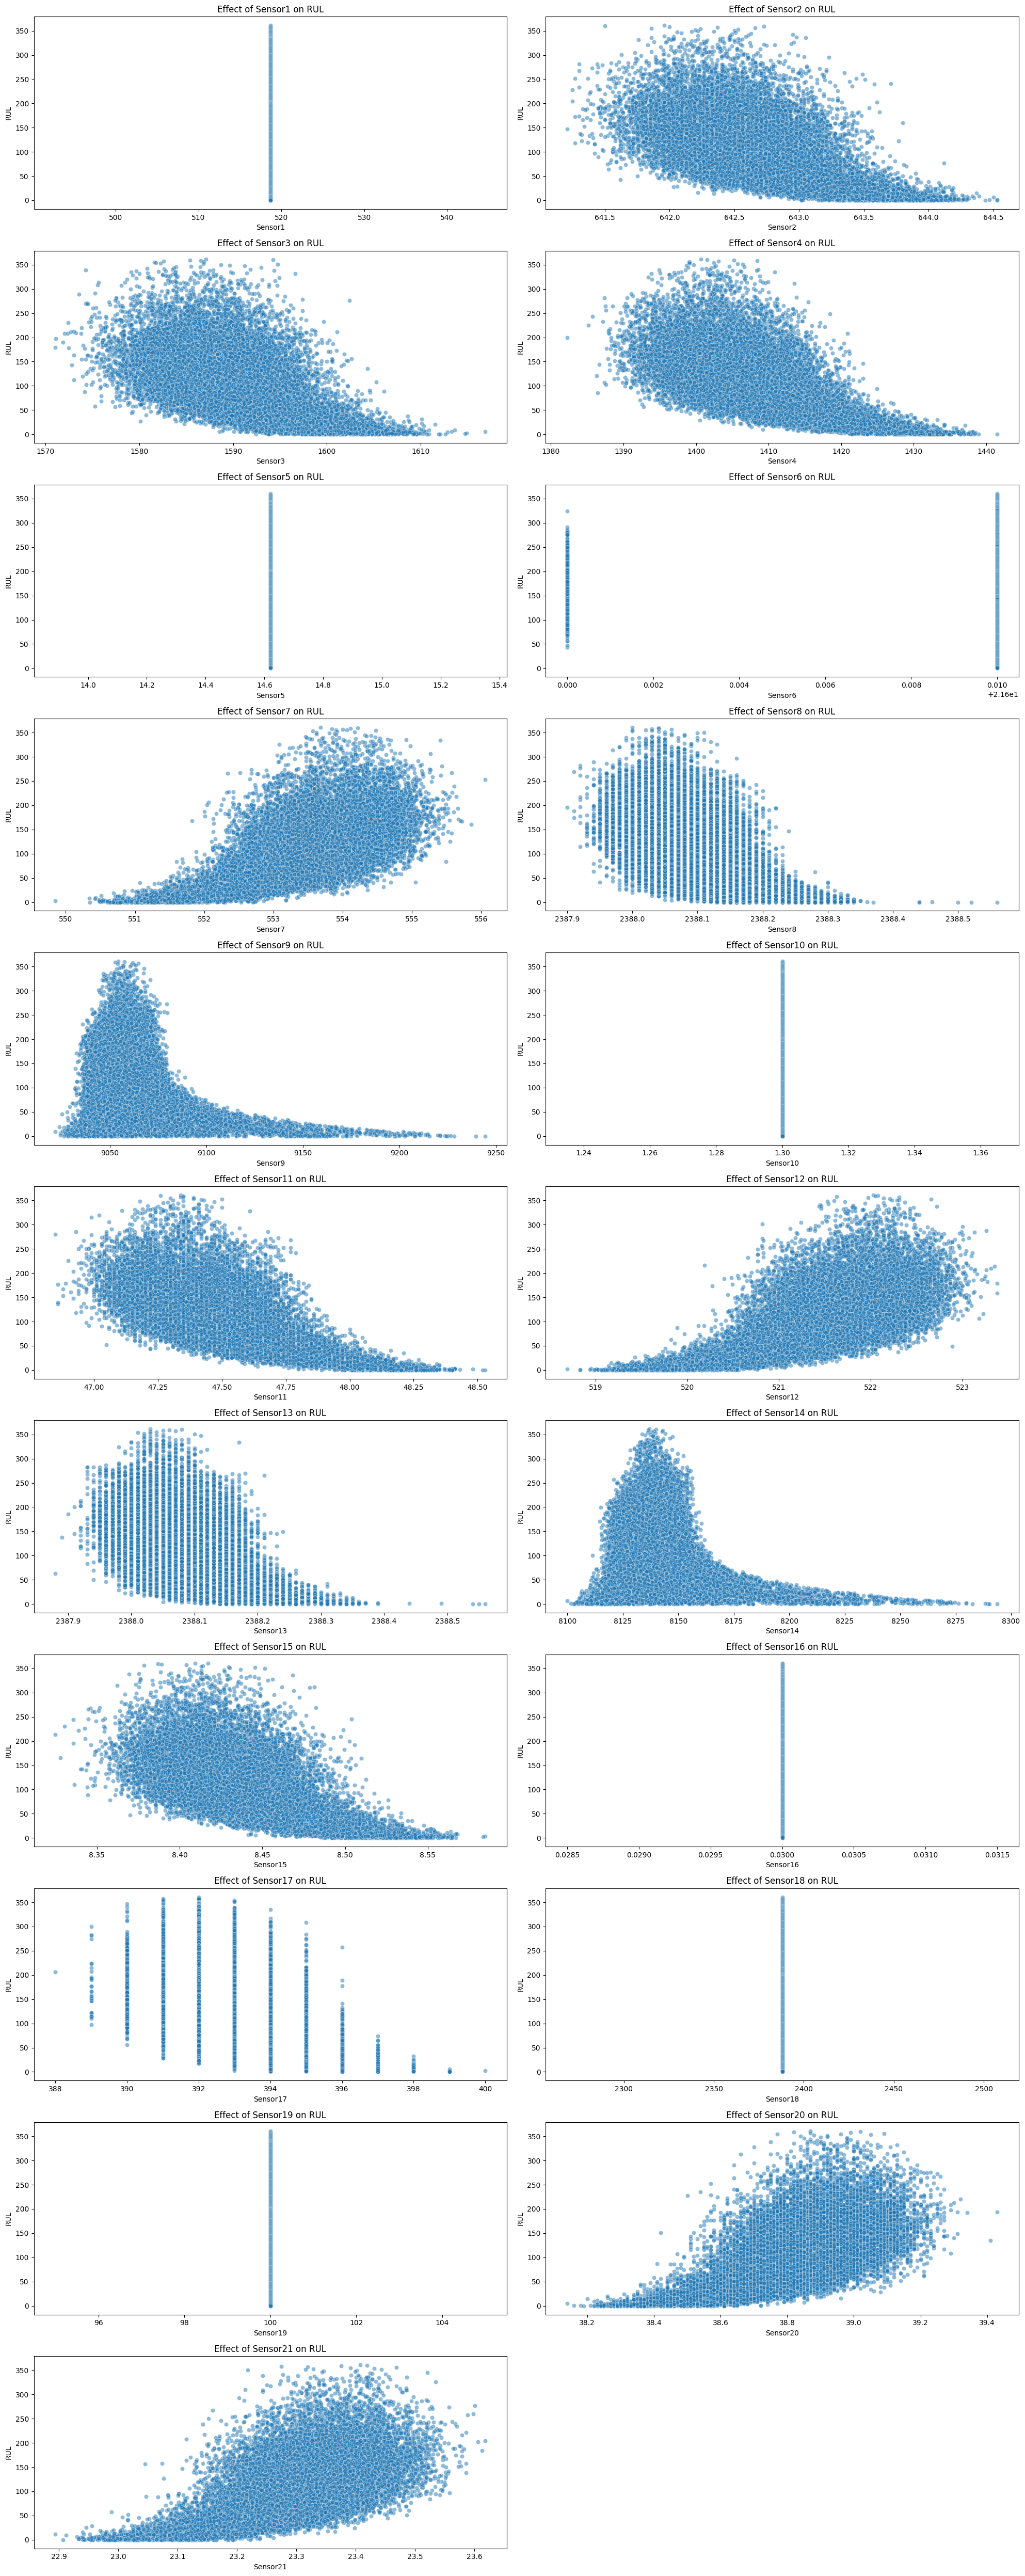

In [ ]:
selected_sensors = ['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5','Sensor6','Sensor7','Sensor8','Sensor9','Sensor10','Sensor11','Sensor12','Sensor13','Sensor14','Sensor15','Sensor16','Sensor17','Sensor18','Sensor19','Sensor20','Sensor21']

train_df['RUL'] = train_df.groupby('EngineID')['Cycle'].transform(lambda x: x.max() - x)

plt.figure(figsize=(20, 50))
for i, sensor in enumerate(selected_sensors, 1):
    plt.subplot(11, 2, i)
    sns.scatterplot(x=train_df[sensor], y=train_df['RUL'], alpha=0.5)
    plt.title(f'Effect of {sensor} on RUL')
    plt.xlabel(sensor)
    plt.ylabel('RUL')

plt.tight_layout()
plt.show()